In [1]:
from pathlib import Path
from pprint import pp

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import (
    PredictionErrorDisplay,
    mean_absolute_percentage_error,
    mean_squared_error,
    r2_score,
)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from P04_ml.T00_lib.classes import MyUtil
from P04_ml.T00_lib.utils import check_jupyter


In [2]:
SAVE_DATA = False
MAKE_ONE_HOT = True

In [3]:
if check_jupyter():
    BASE_DIR = Path.cwd()  # Current directory of the running file
    DATA_DIR = BASE_DIR.parent.parent / "P03_data_preprocess"
    CURRENT_DIR = BASE_DIR
else:
    BASE_DIR = Path.cwd()  # Base directory of the project
    DATA_DIR = BASE_DIR / "src/P03_data_preprocess"
    CURRENT_DIR = Path(__file__).resolve().parent

dt = MyUtil.get_dt()
print(f"Current Directory: {CURRENT_DIR}")
print(f"Current Date and Time: {dt}")

# Load data
df = pd.read_excel(DATA_DIR / "S08_data_combined_single_y.xlsx")
print(df.shape)
df

Code is running in a Jupyter environment.
Current Directory: c:\Users\admin\Coding\research\weld-ml\src\P04_ml\T01_ml_trial
Current Date and Time: 2026-01-04_08-09
(1134, 182)


,sample_no,R,W,D,position,location,fz_location,"dwell_Fz__agg_linear_trend__attr_""slope""__chunk_len_50__f_agg_""max""",dwell_Fz__mean_change,"dwell_Fz__change_quantiles__f_agg_""mean""__isabs_False__qh_1.0__ql_0.0",...,"weld_Fz__fft_coefficient__attr_""real""__coeff_9","weld_Fz__fft_coefficient__attr_""angle""__coeff_26","weld_Fz__fft_coefficient__attr_""angle""__coeff_86","weld_Fz__change_quantiles__f_agg_""mean""__isabs_False__qh_0.6__ql_0.2","weld_Fz__change_quantiles__f_agg_""mean""__isabs_False__qh_1.0__ql_0.2",weld_Fz__ratio_beyond_r_sigma__r_2.5,weld_Fz__binned_entropy__max_bins_10,weld_Fz__kurtosis,section,stress_value
0,1,1400,60,10,0.153846,1,1.244326,-0.015598,-0.000466,-0.000466,...,58.401601,-59.307464,-126.394608,0.000592,0.000077,0.011999,1.996898,0.031761,stress_value_5052,28
1,2,1400,60,15,0.153846,1,1.203367,-0.001207,-0.000060,-0.000060,...,188.462577,-67.104324,-83.441169,0.001515,0.000074,0.026536,1.433742,2.139541,stress_value_5052,14
2,3,1400,60,20,0.153846,1,1.444542,-0.004830,-0.000198,-0.000198,...,79.638692,-73.946166,-100.226178,0.002915,0.000764,0.046766,1.651073,1.957977,stress_value_5052,10
3,4,1400,70,10,0.153846,1,1.601667,-0.012681,-0.000459,-0.000459,...,-8.572183,-109.557287,-92.120362,-0.002131,-0.000669,0.032843,1.331185,3.615244,stress_value_5052,10
4,5,1400,70,15,0.153846,1,1.095031,-0.028589,-0.000819,-0.000819,...,34.610547,142.508379,101.664911,0.005496,0.000705,0.017408,1.739714,-0.003368,stress_value_5052,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1129,50,1600,70,15,0.846154,7,1.905742,-0.025181,-0.000835,-0.000835,...,50.879103,100.417769,70.734310,-0.000276,0.000027,0.012383,2.073254,-0.284814,stress_value_center,2
1130,51,1600,70,20,0.846154,7,1.669120,-0.019329,-0.000656,-0.000656,...,62.884040,77.002325,105.356086,0.002244,0.000891,0.000090,2.110911,-0.807980,stress_value_center,2
1131,52,1600,80,10,0.846154,7,1.671576,-0.034536,-0.000915,-0.000915,...,19.546750,-114.510109,160.581335,0.002110,0.000548,0.011999,1.947229,-0.492903,stress_value_center,5
1132,53,1600,80,15,0.846154,7,1.686495,-0.060666,-0.001356,-0.001356,...,-26.434232,49.909992,-131.625465,0.003661,0.001454,0.042150,1.607697,1.674617,stress_value_center,1


In [4]:
colsY = ["stress_value"]
colsX = [c for c in df.columns if c not in colsY]
print("X columns:", colsX)
print("Y columns:", colsY)

X columns: ['sample_no', 'R', 'W', 'D', 'position', 'location', 'fz_location', 'dwell_Fz__agg_linear_trend__attr_"slope"__chunk_len_50__f_agg_"max"', 'dwell_Fz__mean_change', 'dwell_Fz__change_quantiles__f_agg_"mean"__isabs_False__qh_1.0__ql_0.0', 'dwell_Fz__change_quantiles__f_agg_"mean"__isabs_False__qh_0.8__ql_0.0', 'dwell_Fz__agg_linear_trend__attr_"intercept"__chunk_len_10__f_agg_"var"', 'dwell_Fz__change_quantiles__f_agg_"mean"__isabs_True__qh_1.0__ql_0.6', 'dwell_Fz__fft_coefficient__attr_"real"__coeff_59', 'dwell_Fz__fft_coefficient__attr_"real"__coeff_4', 'dwell_Fz__fft_coefficient__attr_"real"__coeff_71', 'dwell_Fz__partial_autocorrelation__lag_7', 'dwell_Fz__symmetry_looking__r_0.05', 'dwell_Fz__change_quantiles__f_agg_"mean"__isabs_False__qh_1.0__ql_0.8', 'dwell_Fz__change_quantiles__f_agg_"mean"__isabs_False__qh_0.2__ql_0.0', 'dwell_Fz__fft_coefficient__attr_"angle"__coeff_4', 'dwell_Fz__binned_entropy__max_bins_10', 'dwell_Fz__fft_coefficient__attr_"angle"__coeff_88', 'dw

In [5]:
dfY = df[colsY]
dfX_all = df[colsX]

In [6]:
if MAKE_ONE_HOT:
    dft1 = pd.get_dummies(
        dfX_all,
        columns=["section", "location", "R", "W", "D"],
        drop_first=False,
        dtype=int,
    )
    dfX = dft1.drop(columns=["sample_no"])
else:
    dft1 = pd.get_dummies(dfX_all, columns=["section"], drop_first=False, dtype=int)
    dfX = dft1.drop(columns=["sample_no", "location"])
dfX

,position,fz_location,"dwell_Fz__agg_linear_trend__attr_""slope""__chunk_len_50__f_agg_""max""",dwell_Fz__mean_change,"dwell_Fz__change_quantiles__f_agg_""mean""__isabs_False__qh_1.0__ql_0.0","dwell_Fz__change_quantiles__f_agg_""mean""__isabs_False__qh_0.8__ql_0.0","dwell_Fz__agg_linear_trend__attr_""intercept""__chunk_len_10__f_agg_""var""","dwell_Fz__change_quantiles__f_agg_""mean""__isabs_True__qh_1.0__ql_0.6","dwell_Fz__fft_coefficient__attr_""real""__coeff_59","dwell_Fz__fft_coefficient__attr_""real""__coeff_4",...,location_7,R_1400,R_1500,R_1600,W_60,W_70,W_80,D_10,D_15,D_20
0,0.153846,1.244326,-0.015598,-0.000466,-0.000466,0.001578,0.003409,0.054540,0.549447,10.030128,...,0,1,0,0,1,0,0,1,0,0
1,0.153846,1.203367,-0.001207,-0.000060,-0.000060,-0.000243,0.002961,0.066685,0.206725,20.182526,...,0,1,0,0,1,0,0,0,1,0
2,0.153846,1.444542,-0.004830,-0.000198,-0.000198,-0.000230,0.004525,0.054354,0.510514,11.442374,...,0,1,0,0,1,0,0,0,0,1
3,0.153846,1.601667,-0.012681,-0.000459,-0.000459,-0.001317,0.004067,0.058211,0.276479,3.854696,...,0,1,0,0,0,1,0,1,0,0
4,0.153846,1.095031,-0.028589,-0.000819,-0.000819,-0.000218,0.000968,0.055285,2.506562,24.440018,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1129,0.846154,1.905742,-0.025181,-0.000835,-0.000835,-0.000263,0.003179,0.069095,0.583809,19.669345,...,1,0,0,1,0,1,0,0,1,0
1130,0.846154,1.669120,-0.019329,-0.000656,-0.000656,-0.000664,0.003283,0.070212,1.004801,25.757752,...,1,0,0,1,0,1,0,0,0,1
1131,0.846154,1.671576,-0.034536,-0.000915,-0.000915,-0.000276,0.002971,0.072483,0.596623,20.616756,...,1,0,0,1,0,0,1,1,0,0
1132,0.846154,1.686495,-0.060666,-0.001356,-0.001356,-0.001039,0.005970,0.094026,0.938319,14.936861,...,1,0,0,1,0,0,1,0,1,0


In [7]:
# Extract features and targets
_X = dfX.values
_Y = dfY.values

print(_X.shape)
print(_Y.shape)

(1134, 194)
(1134, 1)


In [8]:
_X_train, _X_test, _Y_train, _Y_test = train_test_split(
    _X, _Y, test_size=0.3, random_state=0
)
print(_X_train.shape)
print(_X_test.shape)
print(_Y_train.shape)
print(_Y_test.shape)

(793, 194)
(341, 194)
(793, 1)
(341, 1)


In [9]:
scX = StandardScaler()
X_train = scX.fit_transform(_X_train)
X_test = scX.transform(_X_test)

scY = StandardScaler()
Y_train = scY.fit_transform(_Y_train)
Y_test = scY.transform(_Y_test)

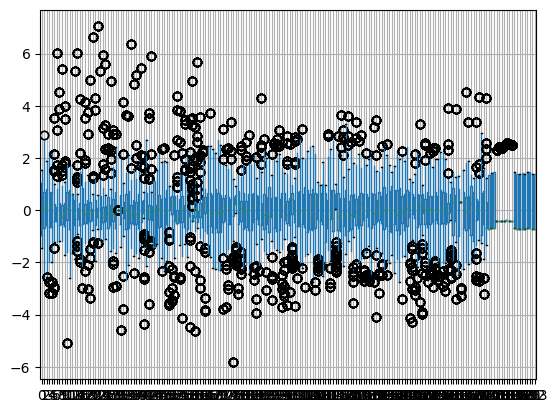

In [10]:
# _X_train.boxplot(figsize=(20,5))
pd.DataFrame(X_train).boxplot()
plt.show()

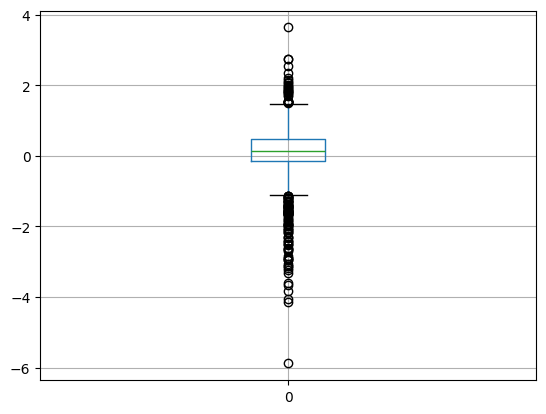

In [11]:
pd.DataFrame(Y_train).boxplot()
plt.show()

In [12]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

# reg = MultiOutputRegressor(estimator=SVR(C=1))
# reg = MultiOutputRegressor(estimator=LinearRegression())
# reg = MultiOutputRegressor(
#     estimator=RandomForestRegressor(n_estimators=200, random_state=0)
# )
# reg = MultiOutputRegressor(
#     estimator=GradientBoostingRegressor(n_estimators=200, random_state=0, max_depth=5)
# )
reg = MultiOutputRegressor(
    estimator=XGBRegressor(n_estimators=200, random_state=0, max_depth=1)
)

In [13]:
reg.fit(X_train, Y_train)

MultiOutputRegressor(estimator=XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None,
                                            feature_weights=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=1,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=200, n_jobs=None,
                                            num_parallel_tree=None, ...))

In [14]:
Y_train_pred = reg.predict(X_train)
Y_test_pred = reg.predict(X_test)

print(Y_train_pred.shape)
print(Y_test_pred.shape)

(793, 1)
(341, 1)


In [15]:
def eval_perf(y_true, y_pred):
    mse = mean_squared_error(y_true=y_true, y_pred=y_pred)
    mape = mean_absolute_percentage_error(y_true=y_true, y_pred=y_pred)
    r2 = r2_score(y_true=y_true, y_pred=y_pred)
    return mse, mape, r2


def print_perf(data):
    for k, v in data.items():
        print(k, ":", v)


data_arr = []
for i in range(0, _Y.shape[1]):
    mse_train, mape_train, r2_train = eval_perf(
        y_true=Y_train[:, i], y_pred=Y_train_pred[:, i]
    )
    mse_test, mape_test, r2_test = eval_perf(
        y_true=Y_test[:, i], y_pred=Y_test_pred[:, i]
    )

    data = {
        "Y": f"Y-{i + 1}",
        "MSE Train": mse_train,
        "MSE Test": mse_test,
        "MAPE Train": mape_train,
        "MAPE Test": mape_test,
        "R2 Train": r2_train,
        "R2 Test": r2_test,
    }
    # print_perf(data)

    data_arr.append(data)

mse_train, mape_train, r2_train = eval_perf(y_true=Y_train, y_pred=Y_train_pred)
mse_test, mape_test, r2_test = eval_perf(y_true=Y_test, y_pred=Y_test_pred)
print_perf(data)

data = {
    "Y": "Y-All",
    "MSE Train": mse_train,
    "MSE Test": mse_test,
    "MAPE Train": mape_train,
    "MAPE Test": mape_test,
    "R2 Train": r2_train,
    "R2 Test": r2_test,
}
data_arr.append(data)
# print_perf(data)

df_eval = pd.DataFrame.from_dict(data_arr)
display(df_eval)

if SAVE_DATA:
    filename = f"eval_{dt}.xlsx"
    df_eval.to_excel(filename, index=False)

Y : Y-1
MSE Train : 0.6929762608759055
MSE Test : 1.0875412335057488
MAPE Train : 3.90152123130196
MAPE Test : 4.653502179380649
R2 Train : 0.30702373912409453
R2 Test : 0.1966225489272886


,Y,MSE Train,MSE Test,MAPE Train,MAPE Test,R2 Train,R2 Test
0,Y-1,0.692976,1.087541,3.901521,4.653502,0.307024,0.196623
1,Y-All,0.692976,1.087541,3.901521,4.653502,0.307024,0.196623


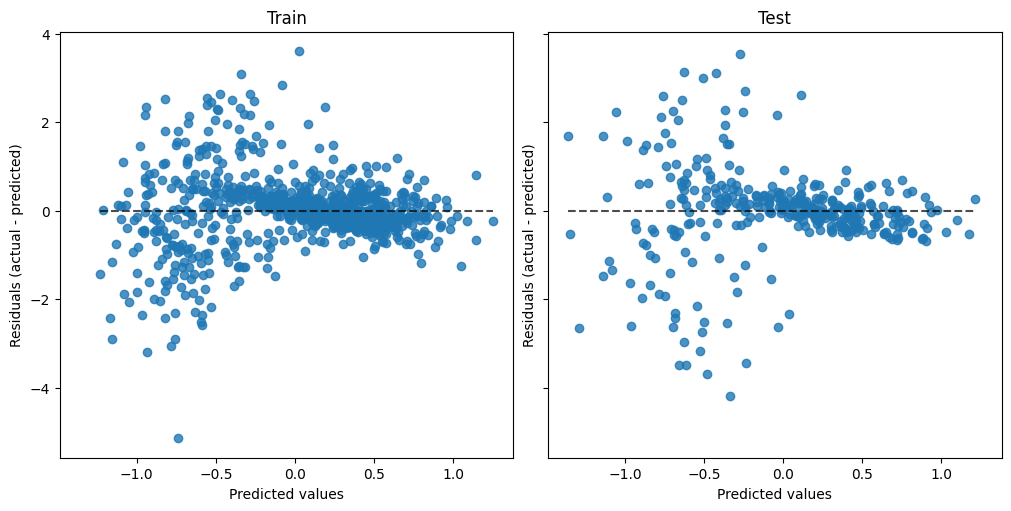

In [16]:
for i in range(0, _Y.shape[1]):
    fig, axes = plt.subplots(
        nrows=1,
        ncols=2,
        figsize=(10, 5),
        constrained_layout=True,
        sharex=True,
        sharey=True,
    )

    display_train = PredictionErrorDisplay(
        y_true=Y_train[:, i], y_pred=Y_train_pred[:, i]
    )
    display_train.plot(ax=axes[0])
    axes[0].set_title("Train")

    display_train = PredictionErrorDisplay(
        y_true=Y_test[:, i], y_pred=Y_test_pred[:, i]
    )
    display_train.plot(ax=axes[1])
    axes[1].set_title("Test")

    if SAVE_DATA:
        filename = f"res_plot_{dt}_{i}.png"
        fig.savefig(filename, dpi=300)

    plt.show()